## Hotel Booking Cancellation Analysis

This notebook is to find out the characteristic of customers who cancelled and finding a pattern in cancelled booking by doing an exploratory data analysis


### Data Dictionary

Feature | Type | Description |
--- | --- | --- |
is_canceled | int | Value indicating if the booking was canceled (1) or not (0). |
Hotel | object | (H1 = Resort Hotel or H2 = City Hotel) |
lead_time | int | Number of days that elapsed between the entering date of the booking into the Property Management System and the arrival date. Calculated by subtracting the entering date from the arrival date. |
arrival_date_year | int | Year of arrival date |
arrival_date_month | object | Month of arrival date |
arrival_date_week_number | int | Week number of year for arrival date |
arrival_date_day_of_month | int | Day of arrival date |
stays_in_weekend_nights | int | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
stays_in_week_nights | int | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
adults | int | Number of adults |
children | float | Number of children |
babies | int | Number of babies |
meal | object | Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner) |
country | object | Country of Origin |
market_segment | object | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
distribution_channel | object | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
is_repeated_guest | int | Value indicating if the booking name was from a repeated guest (1) or not (0) |
previous_cancellations | int | Number of previous bookings that were cancelled by the customer prior to the current booking |
previous_bookings_not_canceled | int | Number of previous bookings not cancelled by the customer prior to the current booking |
reserved_room_type | object | Code of room type reserved. Code is presented instead of designation for anonymity reasons. |
assigned_room_type | object | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
booking_changes | int | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
deposit_type | object | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay |
agent | float | ID of the travel agency that made the booking |
company | float | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
days_in_waiting_list | int | Number of days the booking was in the waiting list before it was confirmed to the customer |
customer_type | object | Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking |
ADR | float | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
required_car_parking_spaces | int | Number of car parking spaces required by the customer |
total_of_special_requests | int | Number of special requests made by the customer (e.g. twin bed or high floor) |
reservation_status | object | Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why |
reservation_status_date | object | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel |

### Context

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for pretty display in notebook
%matplotlib inline

In [2]:
# importing plotly for geographical visualization
import plotly.express as px

#### Read and Understand Data

In [3]:
# Reading the file
path='../data/hotel_bookings.csv'

#Loading the data
hotel_data=pd.read_csv(path)

print('There are {} rows and {} columns'.format(hotel_data.shape[0], hotel_data.shape[1])) # f-string

There are 119390 rows and 32 columns


In [4]:
# Display all columns
pd.set_option('display.max_columns', None)

# Check 5 rows of the data
hotel_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [5]:
#### Understanding the dataset

print('Number of Rows:', hotel_data.shape[0])
print('Number of Columns:', hotel_data.shape[1])
print('-'*25,'\n')
print('Features of Dataset: \n \n', hotel_data.columns.tolist())

Number of Rows: 119390
Number of Columns: 32
------------------------- 

Features of Dataset: 
 
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [6]:
# Checking the data types of the columns

hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Missing Values

In [7]:
# Numerical Values which contains missing values

#numerical_nan=[feature for feature in hotel_data.columns if hotel_data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

#for feature in numerical_nan:
#    print('{}: {}% Missing Values'.format(feature, np.round(hotel_data[feature].isnull().mean(),4)))

print('Missing Values:\n\n', hotel_data.isnull().sum().sort_values(ascending=False))
print('-'*25,'\n\n')
print ('Percentage of Missing values: \n\n', round(hotel_data.isnull().sum()/ hotel_data.isnull().count() * 100, 3).sort_values(ascending=False))

Missing Values:

 company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 

#### Missing values

More than 93% entries are missing from company  
Almost 14% entries are missing from agent  
0.5% entries are missing from country  
Minimal 0.005% entries missing from children  


In [8]:
hotel_data['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [9]:
#Missing Values Treatment for company
#If company is NaN, that means booking has not been done through any company, self or private booking
#So creating another label with 0

hotel_data['company'].fillna(0, inplace=True)

In [10]:
hotel_data['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
304.0        1
431.0        1
278.0        1
450.0        1
114.0        1
Name: agent, Length: 333, dtype: int64

In [11]:
#Handling Missing Values for Agent

# If there is no agent , that means probably booking was done without any agent
hotel_data['agent'].fillna(0, inplace=True)

In [12]:
hotel_data['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [13]:
#Mising values for Children

# If children is marked as Nan, probably that means there is no child or median/mode of values for children is also 0.0
hotel_data['children'].fillna(0.0, inplace=True)

In [14]:
hotel_data['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
HND        1
KIR        1
CYM        1
FJI        1
UMI        1
Name: country, Length: 177, dtype: int64

In [15]:
#Missing Values for Country

#Will introduce new label Others for country mentioned as Nan
hotel_data['country'].fillna('Others', inplace=True)

In [16]:
# From the data, we know that In meal feature, SC and undefined are same, so we would merge these values

hotel_data["meal"].replace("Undefined", "SC", inplace=True)

In [17]:
# Verify Missing values

print('Missing Values:\n\n', hotel_data.isnull().sum())

print('\n\nRows and Columns:', hotel_data.shape)

Missing Values:

 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr       

In [18]:
# Finding out the records where there are no guests

No_Guests_data= (hotel_data['adults']==0) & (hotel_data['children']==0) & (hotel_data['babies']==0)
hotel_data[No_Guests_data]


hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
2224                       3       0       0.0       0   SC     PRT   
2409                       0       0       0.0       0   SC     PRT   
3181                       2       0       0.0       0   SC     ESP   
3684                       4       0       0.0       0   SC     PRT   
3708                       4       0       0.0       0   SC     PRT   
...                      ...     ...       ...     ...  ...     ...   
115029                     3       0       0.0       0   BB     CHE   
115091                     1       0       0.0       0   SC     PRT   
116251                     1       0       0.0       0   SC     SWE   
116534                     5       0       0.0       0   SC     RUS   
117087                     2       0       0.0       0   BB     BRA   

       market_segment distribution_channel  is_repeated_guest  \
2224        Corporate            Corporate                  0   
2409        Corporate            Corporate                  0   
3181           Groups                TA/TO                  0   
3684           Groups                TA/TO                  0   
3708           Groups                TA/TO                  0   
...               ...                  ...                ...   
115029      Online TA                TA/TO                  0   
115091  Complementary               Direct                  0   
116251      Online TA                TA/TO                  0   
116534      Online TA                TA/TO                  0   
117087  Offline TA/TO                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
2224                         0                               0   
2409                         0        

In [19]:
#And then dropping those rows with no guests

hotel_data.drop(hotel_data[No_Guests_data].index, inplace=True)

print("\n\n New Rows and Columns after dropping invalid data of No Guests:", hotel_data.shape)



 New Rows and Columns after dropping invalid data of No Guests: (119210, 32)


In [20]:
# List of numerical variables

numerical_features= [feature for feature in hotel_data.columns if hotel_data[feature].dtypes!='O']

print('Number of numerical values', len(numerical_features))

#Check the numerical variables
hotel_data[numerical_features].head()

Number of numerical values 20


is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        342               2015                        27   
1            0        737               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  booking_changes  agent  company  \
0                               0                3    0.0      0.0   
1                               0                4    0.0      0.0   
2                               0                0    0.0      0.0   
3                               0                0  304.0      0.0   
4                               0                0  240.0      0.0   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1

In [21]:
### Univariate Analysis

In [22]:
# Descriptive statistics of numerical varibales

hotel_data[numerical_features].describe()

is_canceled      lead_time  arrival_date_year  \
count  119210.000000  119210.000000      119210.000000   
mean        0.370766     104.109227        2016.156472   
std         0.483012     106.875450           0.707485   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119210.000000              119210.000000   
mean                  27.163376                  15.798717   
std                   13.601107                   8.781070   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119210.000000         119210.000000  119210.000000   
mean                  0.927053              2.499195       1.859206   
std                   0.995117              1.897106       0.575186   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119210.000000  119210.000000      119210.000000   
mean        0.104043       0.007961           0.031499   
std         0.398836       0.097509           0.174663   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119210.000000                   119210.000000   
mean                 0.087191                        0.137094   
std                  0.844918                        1.498137   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent        company  days_in_waiting_list  \
count    119210.000000  119210.000000  119210.000000         119210.000000   
mean          0.218799      74.889078      10.735400              2.321215   
std           0.638504     107.168884      53.830143             17.598002   
min           0.000000       0.000000       0.000000              0.000000   
25%           0.000000       7.000000       0.000000              0.000000   
50%           0.000000       9.000000       0.000000              0.000000   
75%           0.000000     152.000000       0.000000              0.000000   
max          18.000000     535.000000     543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119210.000000                119210.000000              119210.000000  
mean      101.969092                     0.062553                   0.571504  
std        50.434007                     0.245360                   0.792876  
min        -6.380000                     0.000000                   0.000000  
25%        69.500000                     0.000000                   0.000000  
5

#### Histogram Representation of Numerical Features

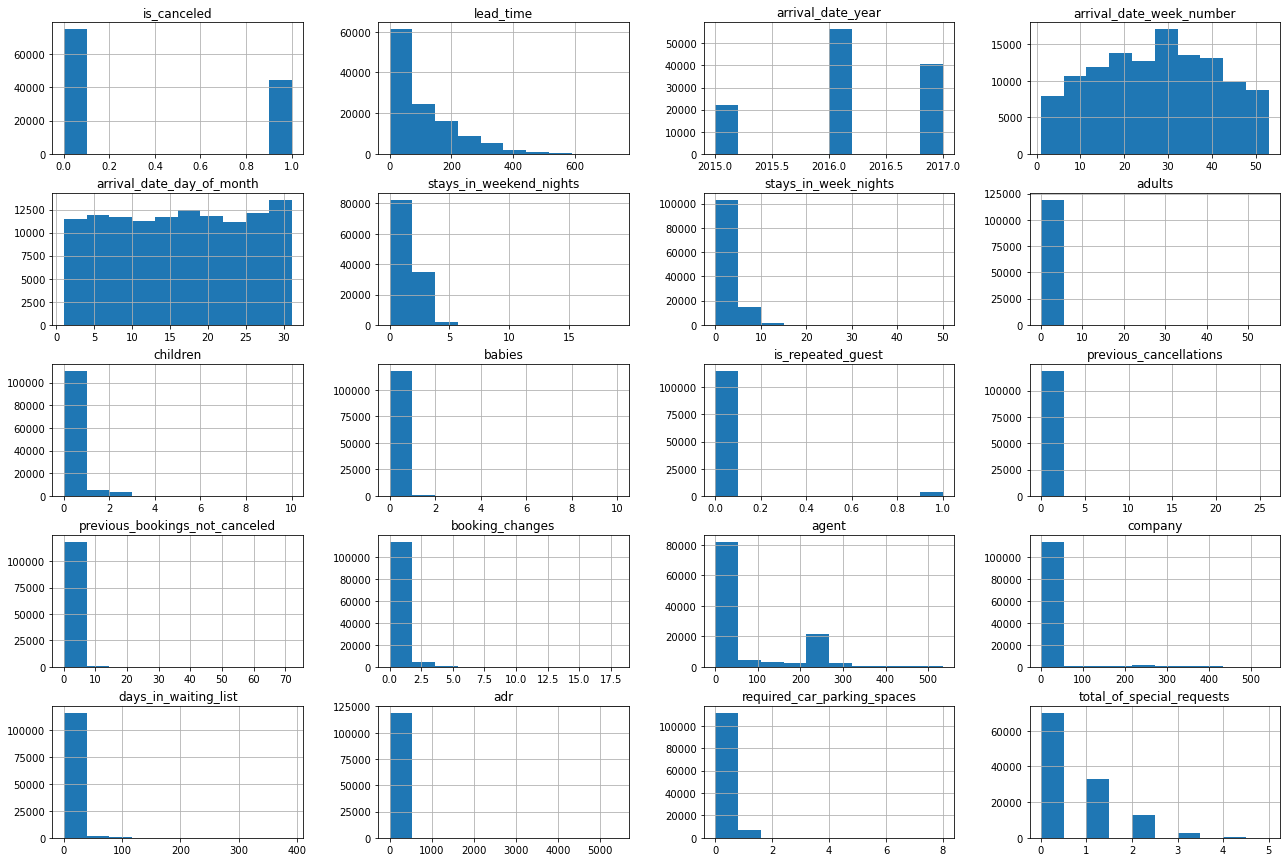

In [23]:
hotel_data.hist(figsize=(22,15))
plt.show()

In [24]:
## Numerical Variables
## Discrete Variables and Continuos Variables

# Discrete Variables
discrete_features=[feature for feature in numerical_features if len(hotel_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_features)))

discrete_features

Discrete Variables Count: 11


['is_canceled',
 'arrival_date_year',
 'stays_in_weekend_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'booking_changes',
 'required_car_parking_spaces',
 'total_of_special_requests']

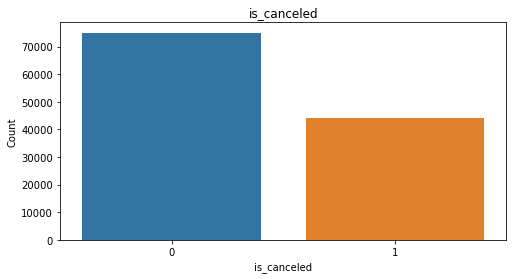

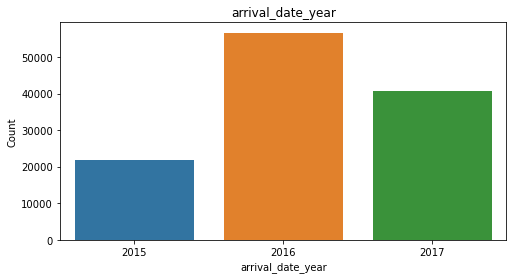

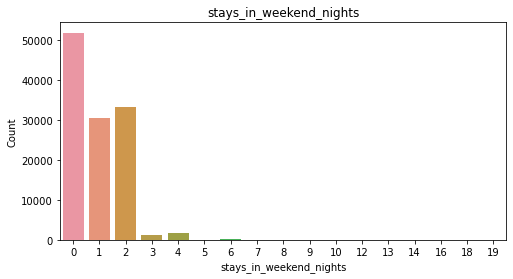

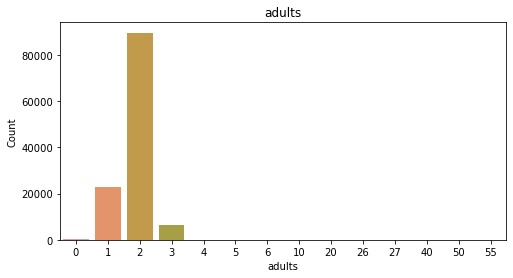

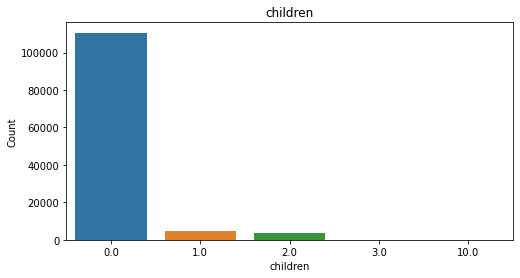

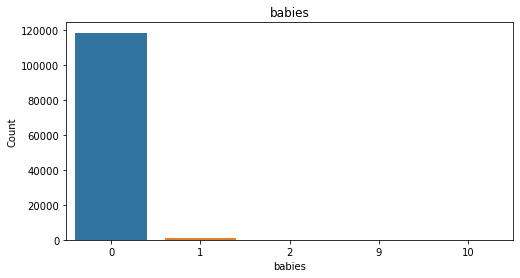

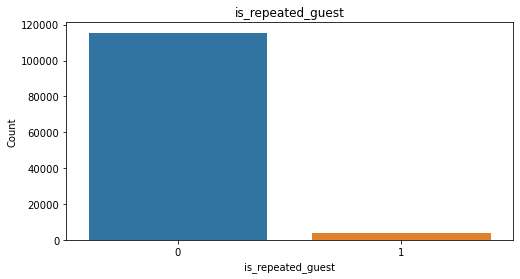

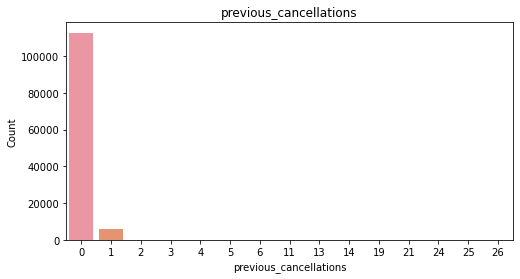

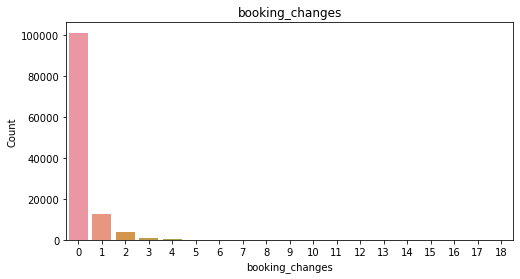

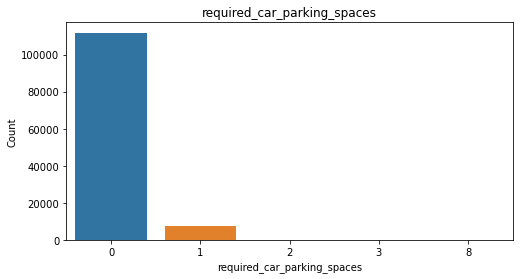

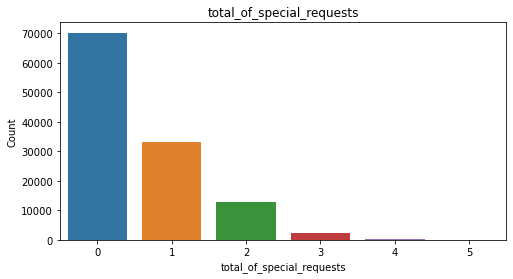

In [25]:
for feature in discrete_features:
    data_copy=hotel_data.copy()
    plt.figure(figsize = (8,4))
    sns.countplot(x = feature, data = hotel_data)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

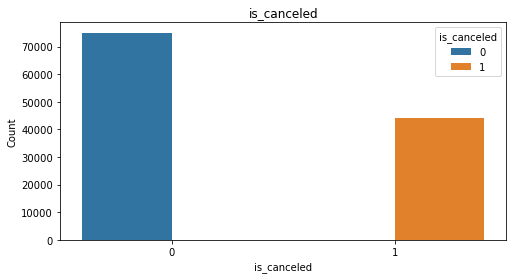

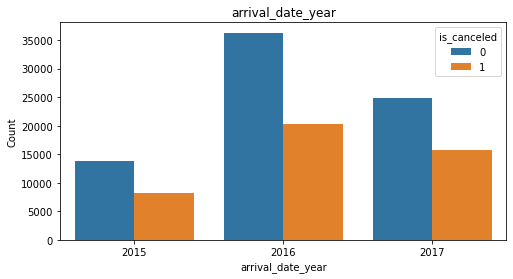

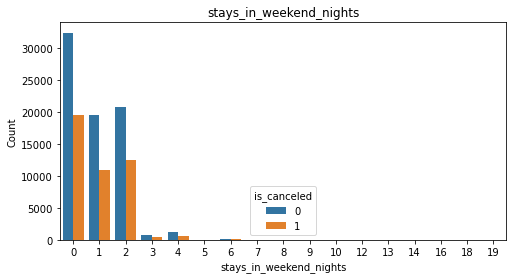

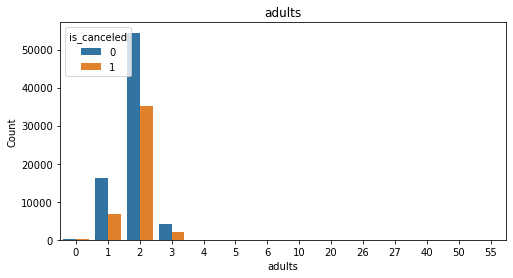

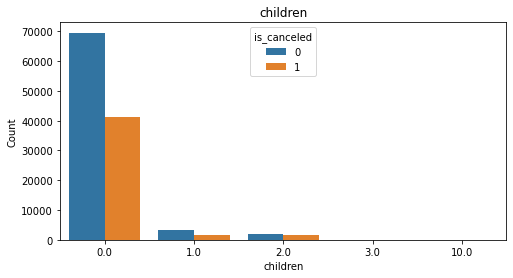

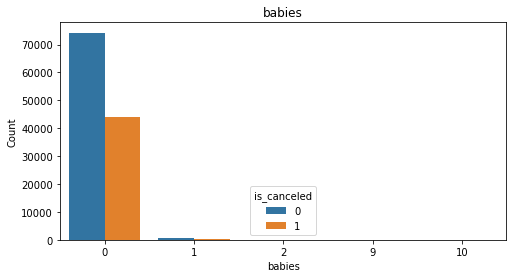

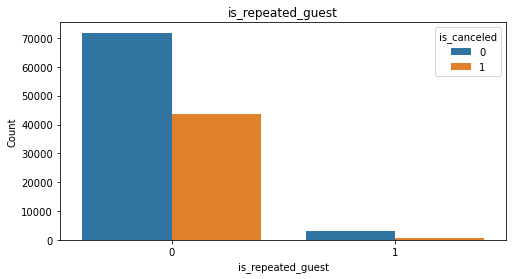

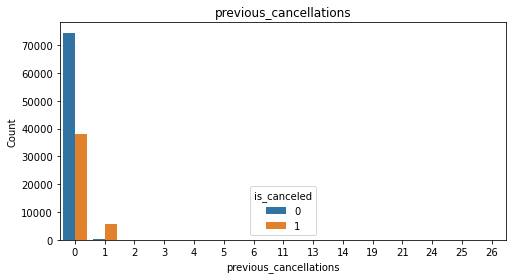

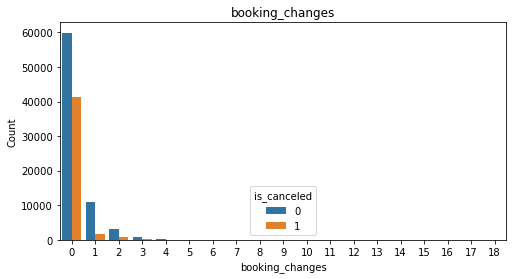

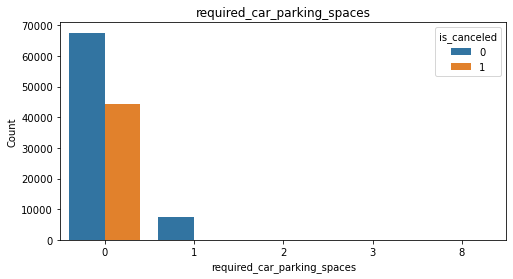

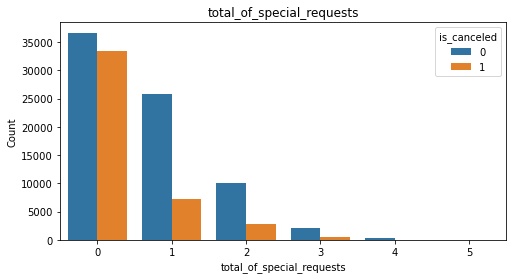

In [26]:
for feature in discrete_features:
    data_copy=hotel_data.copy()
    plt.figure(figsize = (8,4))
    sns.countplot(x = feature,hue='is_canceled', data = hotel_data)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [27]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print('Continuous Features Count: {}'.format(len(continuous_features)))

hotel_data[continuous_features].head()

Continuous Features Count: 9


lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0        342                        27                          1   
1        737                        27                          1   
2          7                        27                          1   
3         13                        27                          1   
4         14                        27                          1   

   stays_in_week_nights  previous_bookings_not_canceled  agent  company  \
0                     0                               0    0.0      0.0   
1                     0                               0    0.0      0.0   
2                     1                               0    0.0      0.0   
3                     1                               0  304.0      0.0   
4                     2                               0  240.0      0.0   

   days_in_waiting_list   adr  
0                     0   0.0  
1                     0   0.0  
2                     0  75.0  
3                     0  75.0  
4                     0  98.0

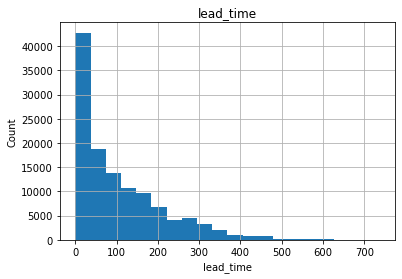

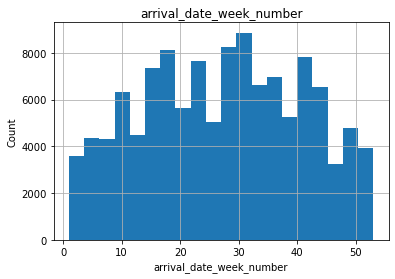

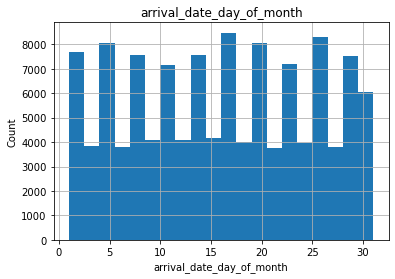

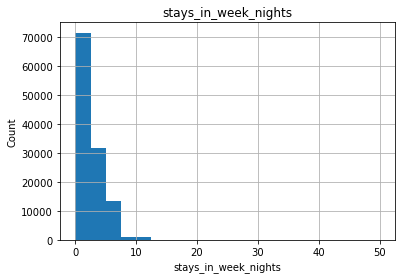

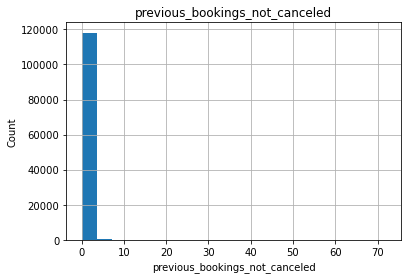

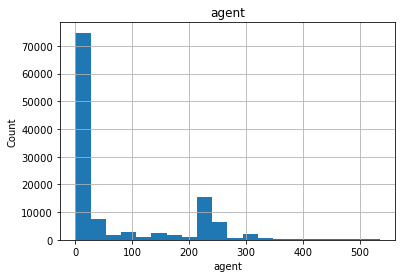

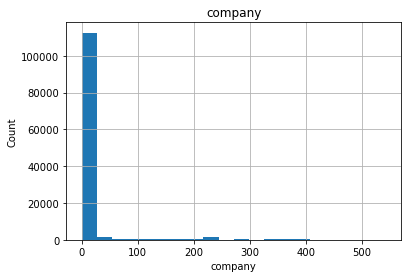

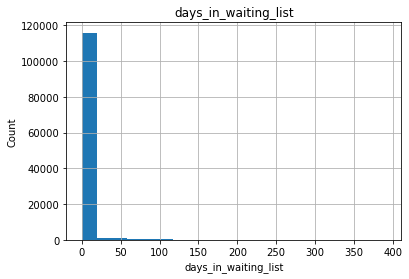

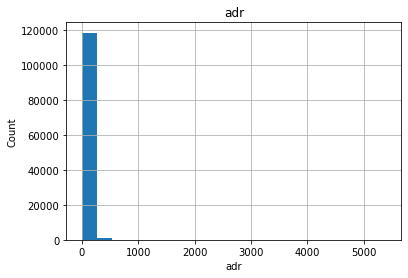

In [28]:
# Understand the relationship b/w continuus varibales and output variable SalePrice 
# but for continuous variables we need to check the distribution of continuous values which can be checked by histograms

for feature in continuous_features:
    data_copy=hotel_data.copy()
    hotel_data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

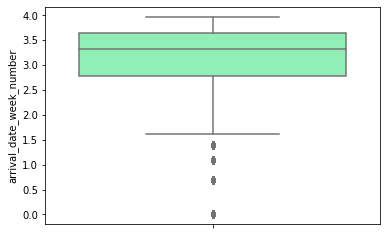

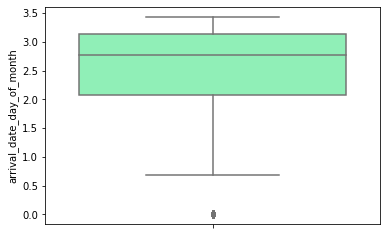

In [29]:
# Outliers are values in the distribution which are outside the particular range, very high value or very low value

for feature in continuous_features:
    data_copy=hotel_data.copy()
    if 0 in data_copy[feature].unique():
        pass
    else:
        data_copy[feature]=np.log(data_copy[feature])
        #data_copy.boxplot(column=feature)
        sns.boxplot(y=feature, data=data_copy, palette='rainbow')
        #plt.ylabel(feature)
        #plt.title(feature)
        plt.show()
        

In [30]:
categorical_features=[feature for feature in hotel_data.columns if hotel_data[feature].dtypes=='O']

hotel_data[categorical_features].head()

hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0               Direct                  C                  C   No Deposit   
1               Direct                  C                  C   No Deposit   
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   

  customer_type reservation_status reservation_status_date  
0     Transient          Check-Out              2015-07-01  
1     Transient          Check-Out              2015-07-01  
2     Transient          Check-Out              2015-07-02  
3     Transient          Check-Out              2015-07-02  
4     Transient          Check-Out              2015-07-03

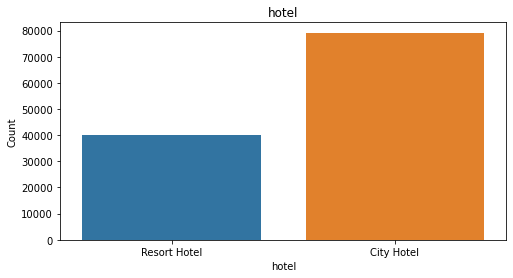

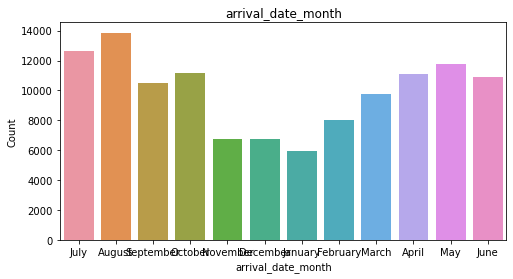

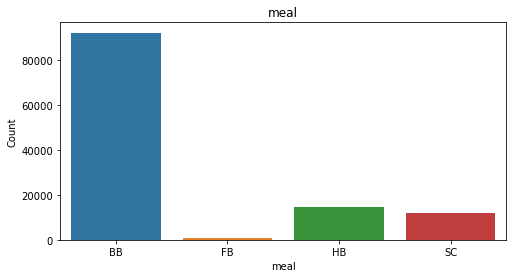

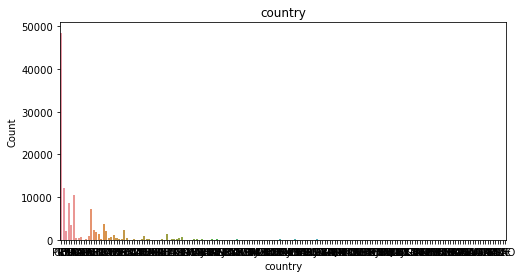

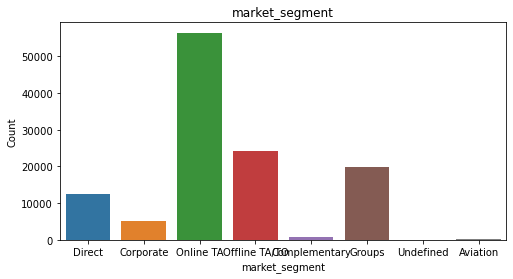

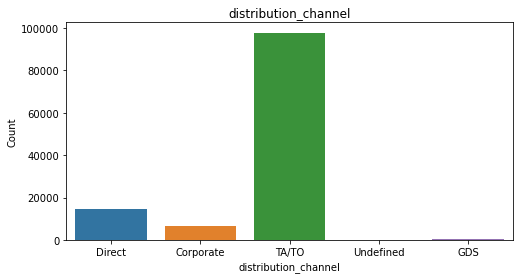

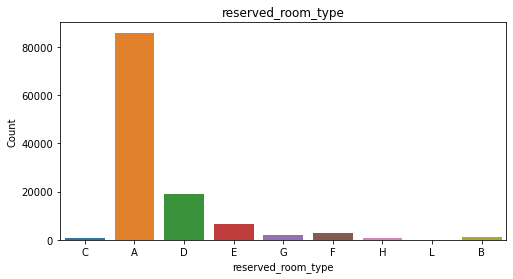

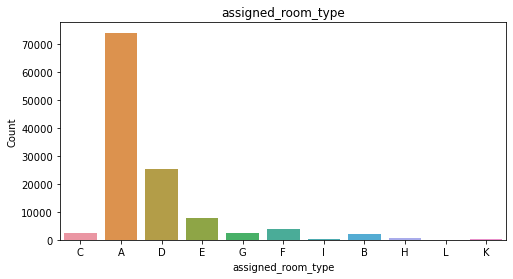

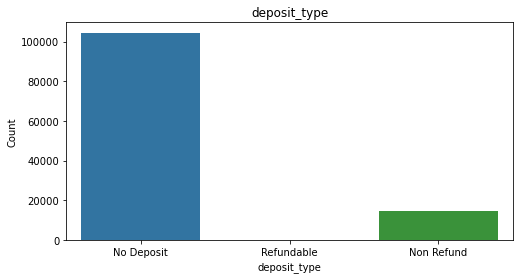

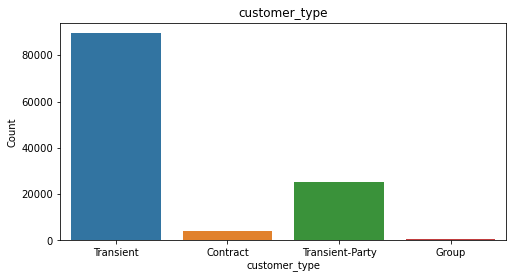

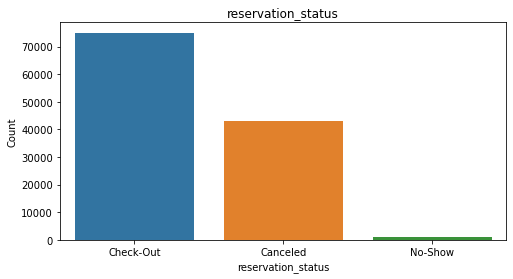

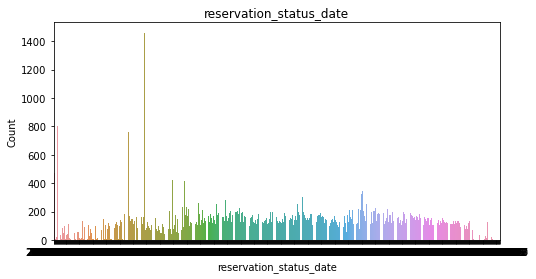

In [31]:
for feature in categorical_features:
    data_copy=hotel_data.copy()
    plt.figure(figsize = (8,4))
    sns.countplot(x = feature, data = hotel_data)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

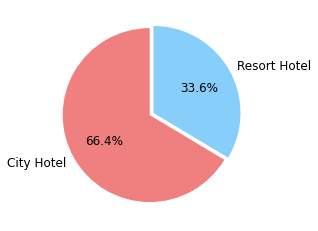

In [32]:
labels = hotel_data['hotel'].value_counts().index.tolist()

# assigning magnitude and converting to list
sizes = hotel_data['hotel'].value_counts().tolist()

# assigning pie chart color
colors = ["lightcoral","lightskyblue"]

explode = (0, 0.05)

plt.pie(sizes,labels=labels,explode=explode, colors=colors,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 12})

# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

In [33]:
for i in categorical_features:
    print('Unique values in',i, 'are :')
    print(hotel_data[i].value_counts())
    print('*'*20)

Unique values in hotel are :
City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64
********************
Unique values in arrival_date_month are :
August       13861
July         12644
May          11780
October      11147
April        11078
June         10929
September    10500
March         9768
February      8052
November      6771
December      6759
January       5921
Name: arrival_date_month, dtype: int64
********************
Unique values in meal are :
BB    92236
HB    14458
SC    11718
FB      798
Name: meal, dtype: int64
********************
Unique values in country are :
PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
NIC        1
PYF        1
FJI        1
MDG        1
MMR        1
Name: country, Length: 178, dtype: int64
********************
Unique values in market_segment are :
Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation        

### Checking Correlation between Features

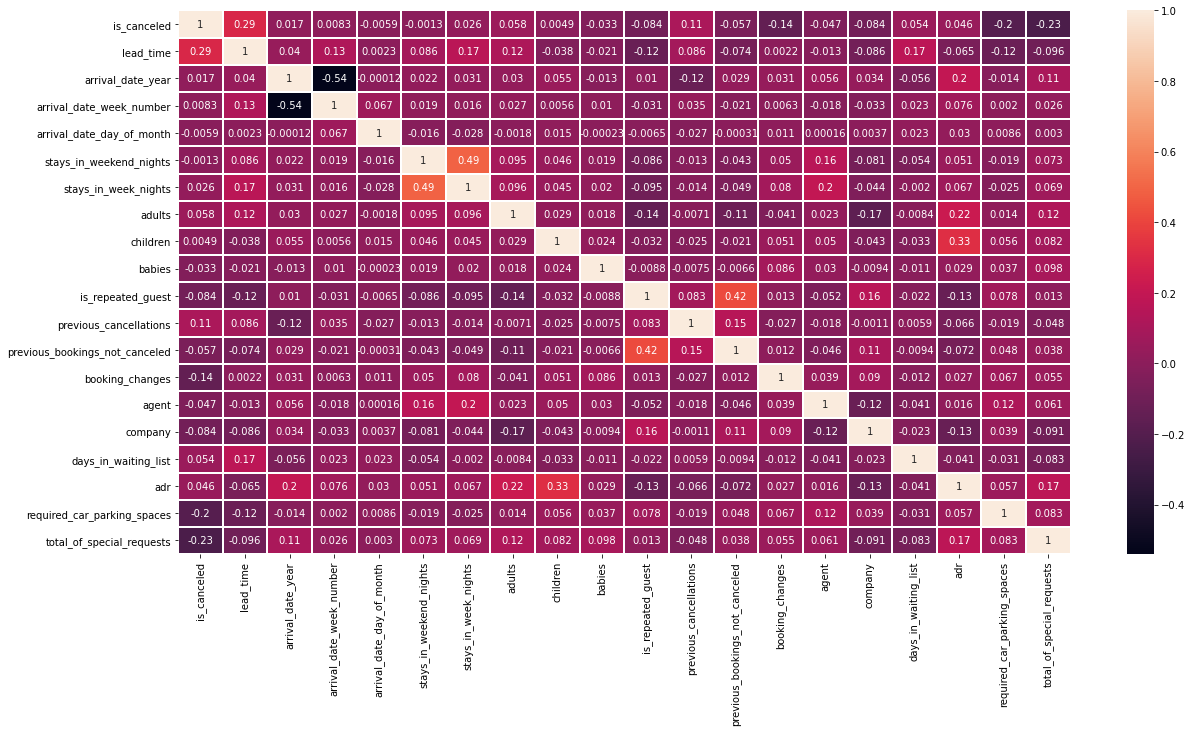

In [34]:
plt.figure(figsize = (20, 10))

sns.heatmap(hotel_data.corr(), annot = True, linewidths = 1)
plt.show()

In [35]:
correlation_values= hotel_data.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation_values

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

From the pearson Correlation, we get that:   
lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations are the top most important numerical features

### Business Questions AND Data Visualization

#### Cancellation by Repeated Guests

Text(0.5, 1.0, 'Canceled or not')

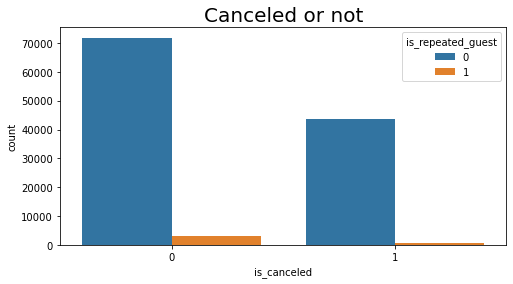

In [36]:
plt.figure(figsize = (8,4))
sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = hotel_data)
plt.title("Canceled or not", fontdict = {'fontsize': 20})

 This tells us that Repeated guests do not cancel their reservations. Of course there are some exceptions. Also most of the customers are not repeated guests.

#### Which Market segment contribute to more cancellations?

Text(0.5, 1.0, 'Distributon of Segments by Cancellation')

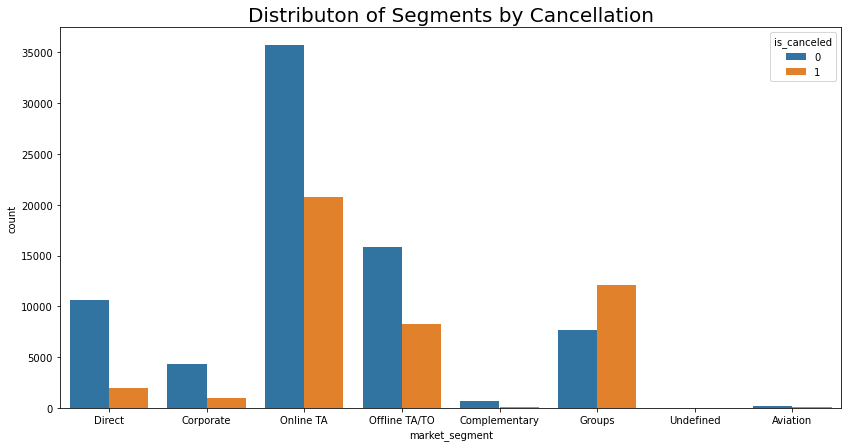

In [37]:
plt.figure(figsize = (14,7))
sns.countplot(x = "market_segment", hue = 'is_canceled', data = hotel_data)
plt.title("Distributon of Segments by Cancellation", fontdict = {'fontsize': 20})

For Groups segment there are more cancellations than non cancellations, that is, more than half of the booking made by Groups Segment got cancelled   
One third of the booking made by Online TA OR Offline TA/TO also got cancelled   
Direct Booking has low cancellations

#### Which are the most busy months?

In [38]:
# For this, will take only non cancelled rooms 
non_canceled_data= hotel_data[hotel_data['is_canceled']==0]
non_canceled_data

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [39]:
#monthly_guests =non_canceled_data['arrival_date_month'].value_counts().reset_index()
#monthly_guests.columns = ['month', 'Number_of_guests']
#monthly_guests

resort_data = non_canceled_data[(non_canceled_data['hotel'] == 'Resort Hotel')]
city_data = non_canceled_data[(non_canceled_data['hotel'] == 'City Hotel')]


In [40]:
resort_guests = resort_data['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','number_of_guests']
resort_guests['hotel']="Resort Hotel"


city_guests = city_data['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','number_of_guests']
city_guests['hotel']="City Hotel"

#Merging both of them
both_hotel_guests=pd.concat([resort_guests,city_guests], ignore_index=True)
both_hotel_guests

month  number_of_guests         hotel
0      August              3257  Resort Hotel
1        July              3137  Resort Hotel
2     October              2575  Resort Hotel
3       March              2571  Resort Hotel
4       April              2550  Resort Hotel
5         May              2535  Resort Hotel
6    February              2308  Resort Hotel
7   September              2102  Resort Hotel
8        June              2037  Resort Hotel
9    December              2014  Resort Hotel
10   November              1975  Resort Hotel
11    January              1866  Resort Hotel
12     August              5367    City Hotel
13       July              4770    City Hotel
14        May              4568    City Hotel
15       June              4358    City Hotel
16    October              4326    City Hotel
17  September              4283    City Hotel
18      March              4049    City Hotel
19      April              4010    City Hotel
20   February              3051    City Hotel
21   November              2676    City Hotel
22   December              2377    City Hotel
23    January              2249    City Hotel

In [41]:
# order by month:
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
both_hotel_guests.index = pd.CategoricalIndex(both_hotel_guests["month"], categories=months_order, ordered=True)
both_hotel_guests=both_hotel_guests.sort_index().reset_index(drop=True)
both_hotel_guests

month  number_of_guests         hotel
0     January              1866  Resort Hotel
1     January              2249    City Hotel
2    February              2308  Resort Hotel
3    February              3051    City Hotel
4       March              2571  Resort Hotel
5       March              4049    City Hotel
6       April              2550  Resort Hotel
7       April              4010    City Hotel
8         May              2535  Resort Hotel
9         May              4568    City Hotel
10       June              2037  Resort Hotel
11       June              4358    City Hotel
12       July              3137  Resort Hotel
13       July              4770    City Hotel
14     August              5367    City Hotel
15     August              3257  Resort Hotel
16  September              4283    City Hotel
17  September              2102  Resort Hotel
18    October              4326    City Hotel
19    October              2575  Resort Hotel
20   November              1975  Resort Hotel
21   November              2676    City Hotel
22   December              2014  Resort Hotel
23   December              2377    City Hotel

In [42]:
# Dataset has July and August date from 3 years, and other months data from 2 years.
both_hotel_guests.loc[(both_hotel_guests["month"] == "July") | (both_hotel_guests["month"] == "August"),
                    "number_of_guests"] /= 3
both_hotel_guests.loc[~((both_hotel_guests["month"] == "July") | (both_hotel_guests["month"] == "August")),
                    "number_of_guests"] /= 2

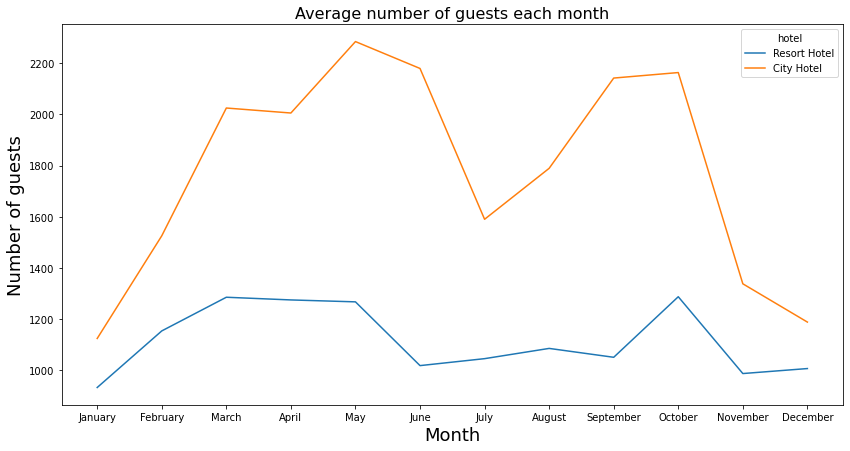

In [43]:
#show VISUALIZATION:

plt.figure(figsize=(14, 7))
sns.lineplot(x = "month", y="number_of_guests", hue="hotel", data=both_hotel_guests 
             )
plt.title("Average number of guests each month", fontsize=16)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Number of guests", fontsize=18)
plt.show()

The City hotel has more guests during spring and autumn, when the prices are also highest.   
In July and August there are less visitors, although prices are lower.

Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.   
Both hotels have the fewest guests during the winter.

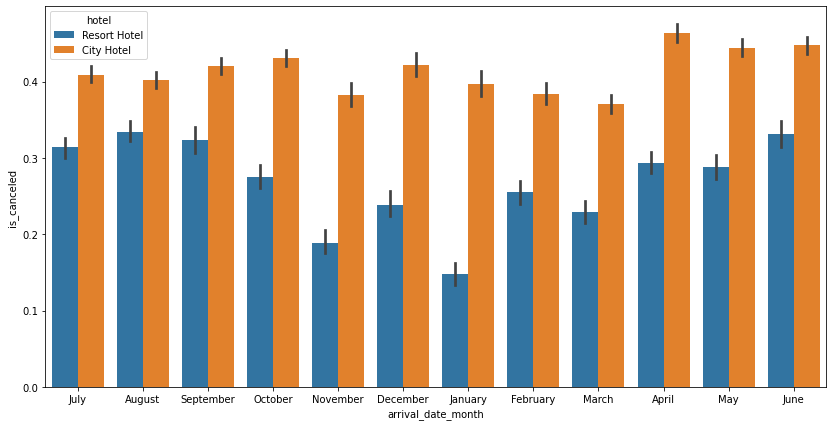

In [44]:
### Month-wise Cancellations

plt.figure(figsize = (14,7))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data = hotel_data);

#### How much do the guests pay for a room per night?

Text(0, 0.5, 'Price')

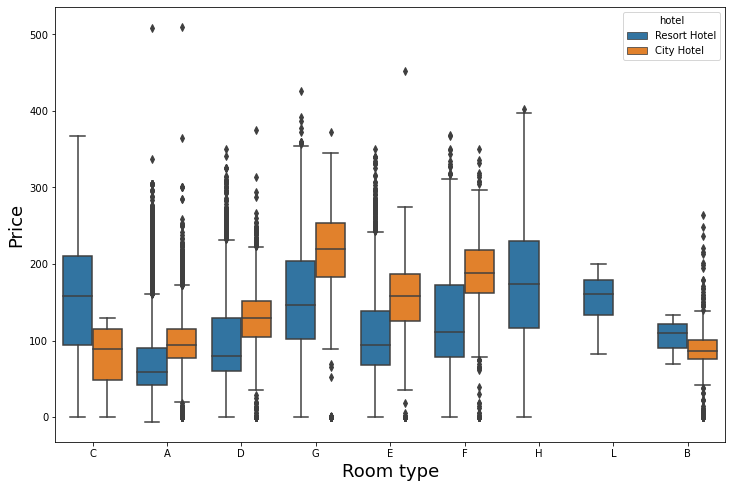

In [45]:
#reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.
#adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type", y="adr", hue="hotel", data=non_canceled_data)
            
plt.xlabel("Room type", fontsize=18)
plt.ylabel("Price",fontsize=18)

#### How does the price per night vary over the year?

In [46]:
hotel_monthly = non_canceled_data[["hotel", "arrival_date_month", "adr"]]


# order by month:
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
hotel_monthly.index = pd.CategoricalIndex(hotel_monthly["arrival_date_month"], categories=months_order, ordered=True)
hotel_monthly=hotel_monthly.sort_index().reset_index(drop=True)
hotel_monthly

hotel arrival_date_month    adr
0        City Hotel            January  67.15
1      Resort Hotel            January  26.00
2      Resort Hotel            January  26.00
3      Resort Hotel            January   4.00
4      Resort Hotel            January  39.00
...             ...                ...    ...
75006    City Hotel           December  67.26
75007    City Hotel           December  74.61
75008    City Hotel           December  88.00
75009    City Hotel           December  95.20
75010    City Hotel           December  79.00

[75011 rows x 3 columns]

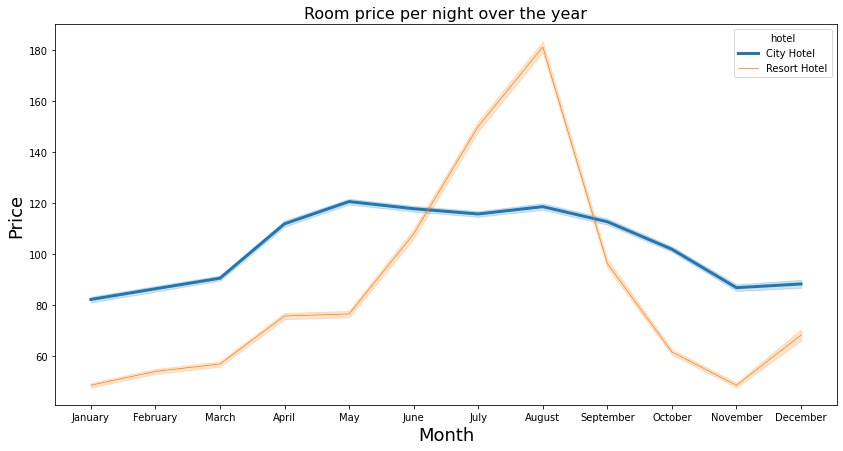

In [47]:
plt.figure(figsize=(14, 7))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=hotel_monthly, size="hotel")
plt.title("Room price per night over the year", fontsize=16)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.show()

This clearly shows that the prices in the Resort hotel are much higher during June-September.   
The price of the city hotel varies less and is most expensive during spring and autumn.


#### How many days people stay in each hotel with respect to  market segment

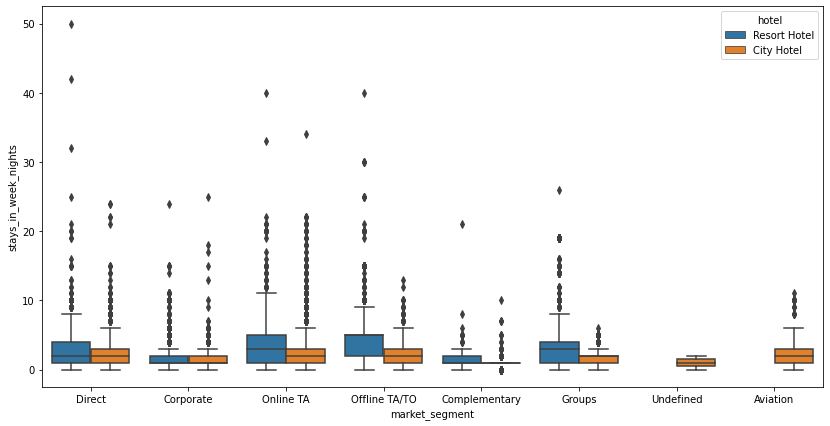

In [48]:
## Boxplot Distribution of Nights Spent at Hotels by Market Segment and Hotel Type

plt.figure(figsize = (14,7))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = hotel_data, hue = "hotel");

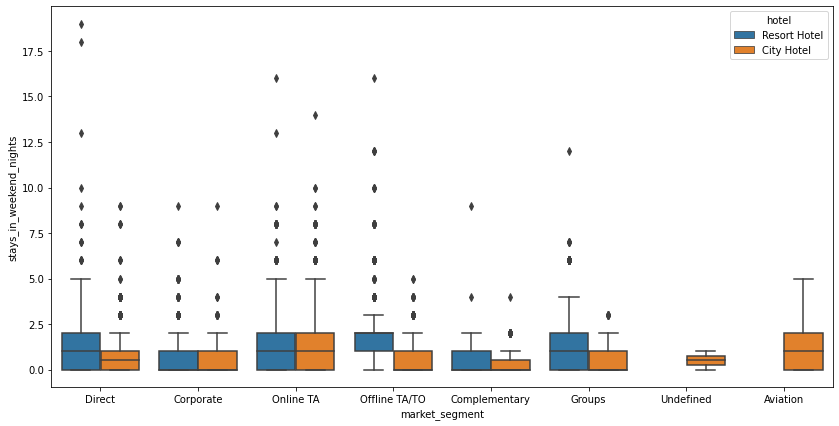

In [49]:
plt.figure(figsize=(14,7))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = hotel_data, hue = "hotel");

Observing the distribution, most people do not seem to prefer to stay at the hotel for more than 1 week   
Also, Customers from Aviation Segment do not seem to be staying at the resort hotels   
Customers going to stay at Resort Hotel for relatively more number of days

#### How long do people stay at the hotels?

In [50]:
non_canceled_data['total_nights'] = non_canceled_data['stays_in_weekend_nights'] + non_canceled_data['stays_in_week_nights']
non_canceled_data

<ipython-input-50-c4f6847dc2aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_canceled_data['total_nights'] = non_canceled_data['stays_in_weekend_nights'] + non_canceled_data['stays_in_week_nights']


hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [51]:
stay = non_canceled_data.groupby(['total_nights', 'hotel']).size().reset_index(name='Number of Bookings')
stay

total_nights         hotel  Number of Bookings
0              0    City Hotel                 251
1              0  Resort Hotel                 371
2              1    City Hotel                9155
3              1  Resort Hotel                6579
4              2    City Hotel               10983
..           ...           ...                 ...
57            46  Resort Hotel                   1
58            48    City Hotel                   1
59            56  Resort Hotel                   1
60            60  Resort Hotel                   1
61            69  Resort Hotel                   1

[62 rows x 3 columns]

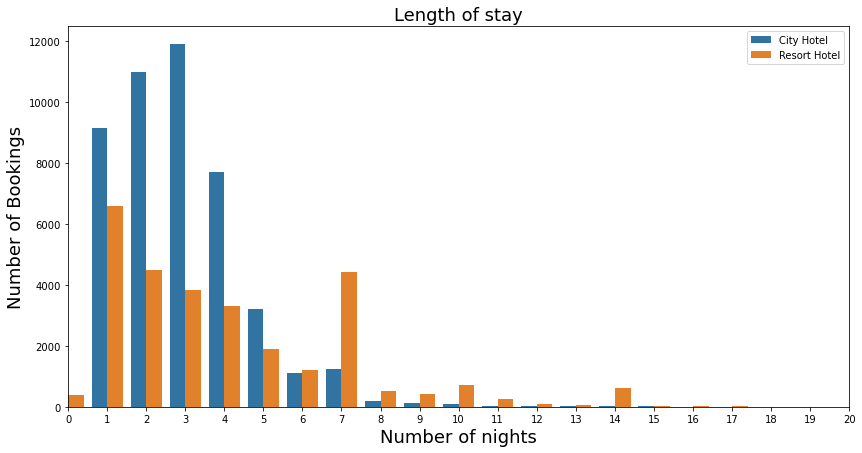

In [52]:
plt.figure(figsize=(14, 7))
sns.barplot(x = "total_nights", y = "Number of Bookings", hue="hotel", data=stay)
plt.title("Length of stay", fontsize=18)
plt.xlabel("Number of nights", fontsize=18)
plt.ylabel("Number of Bookings", fontsize=18)
plt.xlim(0,20)
plt.legend(loc="upper right")
plt.show()

For the city hotel, most often 1-4 nights are booked   
For the resort hotel, 1-4 nights or 7 nights are the options which are often booked.

#### Where Do the guests come from??

In [53]:
country_data = hotel_data[hotel_data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_data.columns = ['country', 'Number_of_guests']
country_data

country  Number_of_guests
0       PRT             20977
1       GBR              9668
2       FRA              8468
3       ESP              6383
4       DEU              6067
..      ...               ...
161     LCA                 1
162     CYM                 1
163     SMR                 1
164     MMR                 1
165     NPL                 1

[166 rows x 2 columns]

In [54]:
labels = country_data.value_counts().index.tolist()

country_map = px.choropleth(country_data, locations = country_data['country'],
                    color_continuous_scale="sunsetdark",
                           color = country_data['Number_of_guests'], hover_name = country_data['country'])
country_map.show()

In [55]:

country_pie = px.pie(country_data,
             values="Number_of_guests",
             names="country",
             title="Origin country of guests",
             template="seaborn")
country_pie.update_traces(textposition="inside", textinfo="value+percent+label")
country_pie.show()

In [56]:
Q1 = hotel_data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = hotel_data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. 
                                        #All values outside these bounds are outliers
upper=Q3+1.5*IQR


In [57]:
((hotel_data.select_dtypes(include=['float64','int64'])<lower) | (hotel_data.select_dtypes(include=
['float64','int64'])>upper)).sum()/len(hotel_data)*100

is_canceled                        0.000000
lead_time                          2.500629
arrival_date_year                  0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.216425
stays_in_week_nights               2.793390
adults                            24.771412
children                           7.205771
babies                             0.769231
is_repeated_guest                  3.149904
previous_cancellations             5.434947
previous_bookings_not_canceled     3.030786
booking_changes                   15.080950
agent                              1.049409
company                            5.677376
days_in_waiting_list               3.097894
adr                                3.241339
required_car_parking_spaces        6.215083
total_of_special_requests          2.410872
dtype: float64